# Analysis

-Capomulin is the drug which has maximum positive impact on tumor volume 

-Metastatic spread under the effect of the Capomulin is least of all the four drugs

-Infubinol has minimum survival rate where as Capomulin has maximun survival rate of all the four drugs

-Capomulin have most decrease rate of volume of the tumor.



In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
#file import and merge two file
data1=pd.DataFrame(pd.read_csv("raw_data/clinicaltrial_data.csv"))
data2=pd.DataFrame(pd.read_csv("raw_data/mouse_drug_data.csv"))
#Merge two files
data=pd.merge(data1,data2, on="Mouse ID")
#Replace NA with Zero
data=data.fillna(0)
data.head()

Capomulin_data=data.loc[data["Drug"]=="Capomulin"]
Infubinol_data=data.loc[data["Drug"]=="Infubinol"]
Ketapril_data=data.loc[data["Drug"]=="Ketapril"]
Placebo_data=data.loc[data["Drug"]=="Placebo"]


In [83]:
pd.DataFrame(Ketapril_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,47.389175
10,49.582269
15,52.399974
20,54.920935
25,57.678982
30,60.994507
35,63.371686
40,66.068580


# Tumor Response to Treatment

In [84]:
# mean value 
tumor_response=pd.DataFrame(data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean())
tumor_response.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [85]:
#Pivot table 
treatment_response_pivot=pd.pivot_table(data,index="Timepoint",columns="Drug",values="Tumor Volume (mm3)",aggfunc='mean')
treatment_response_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [86]:

#get data for only four drugs : (Capomulin, Infubinol, Ketapril, and Placebo) 

tumor_response_Capomulin=pd.DataFrame(Capomulin_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())

tumor_response_Infubinol=pd.DataFrame(Infubinol_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())

tumor_response_Ketapril=pd.DataFrame(Ketapril_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())

tumor_response_Placebo=pd.DataFrame(Placebo_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())

# X-axis for each group of medicine

Capomulin_x=tumor_response_Capomulin.index
Infubinol_x=tumor_response_Infubinol.index
Ketapril_x=tumor_response_Ketapril.index
Placebo_x=tumor_response_Placebo.index

# Y-axis for each group of medicine
tumor_response_Capomulin_y=tumor_response_Capomulin["Tumor Volume (mm3)"]
tumor_response_Infubinol_y=tumor_response_Infubinol["Tumor Volume (mm3)"]
tumor_response_Ketapril_y=tumor_response_Ketapril["Tumor Volume (mm3)"]
tumor_response_Placebo_y=tumor_response_Placebo["Tumor Volume (mm3)"]



In [87]:
# error calcultation for each drug

error_Capomulin_response = Capomulin_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].sem()
error_Infubinol_response = Infubinol_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].sem()
error_Ketapril_response = Ketapril_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].sem()
error_Placebo_response = Placebo_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].sem()


In [89]:
#plot the scatter plot for each medicine


Capomulin=plt.scatter(Capomulin_x, tumor_response_Capomulin_y,
                      marker="o",facecolors="Orange", edgecolors="black",s=50, alpha=0.75,label="Capomulin")


Infubinol=plt.scatter(Infubinol_x, tumor_response_Infubinol_y
                      ,marker="o",facecolors="Blue", edgecolors="black",s=50, alpha=0.75,label="Infubinol")

Ketapril=plt.scatter(Ketapril_x, tumor_response_Ketapril_y, 
                marker="o",facecolors="Green", edgecolors="black",s=50, alpha=0.75,label="Ketapril")

Placebo=plt.scatter(Placebo_x, tumor_response_Placebo_y
                   , marker="o",facecolors="Yellow", edgecolors="black",s=50, alpha=0.75,label="Placebo")

#error plot
plt.errorbar(Capomulin_x,tumor_response_Capomulin_y,yerr=error_Capomulin_response,LineStyle=":")
plt.errorbar(Infubinol_x,tumor_response_Infubinol_y,yerr=error_Infubinol_response,LineStyle=":")
plt.errorbar(Ketapril_x,tumor_response_Ketapril_y,yerr=error_Ketapril_response,LineStyle=":")
plt.errorbar(Placebo_x,tumor_response_Placebo_y,yerr=error_Placebo_response,LineStyle=":")



<Container object of 3 artists>

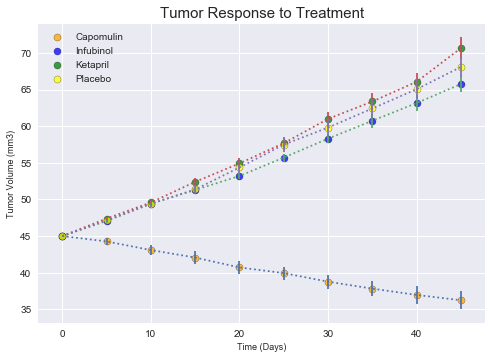

In [90]:
#adding the text to axis and overall title
plt.title('Tumor Response to Treatment', fontsize=15)
plt.xlabel('Time (Days)', fontsize=9)
plt.ylabel('Tumor Volume (mm3)', fontsize=9)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")

#show the plot
plt.show()

# Metastatic Response to Treatment

In [62]:
#get data for only four drugs : (Capomulin, Infubinol, Ketapril, and Placebo) 

tumor_sites_Capomulin=pd.DataFrame(Capomulin_data.groupby(["Timepoint"])["Metastatic Sites"].mean())

tumor_sites_Infubinol=pd.DataFrame(Infubinol_data.groupby(["Timepoint"])["Metastatic Sites"].mean())

tumor_sites_Ketapril=pd.DataFrame(Ketapril_data.groupby(["Timepoint"])["Metastatic Sites"].mean())

tumor_sites_Placebo=pd.DataFrame(Placebo_data.groupby(["Timepoint"])["Metastatic Sites"].mean())

# Y-axis for each group of medicine
tumor_sites_Capomulin_y=tumor_sites_Capomulin["Metastatic Sites"]
tumor_sites_Infubinol_y=tumor_sites_Infubinol["Metastatic Sites"]
tumor_sites_Ketapril_y=tumor_sites_Ketapril["Metastatic Sites"]
tumor_sites_Placebo_y=tumor_sites_Placebo["Metastatic Sites"]


In [63]:
# error calcultation for each drug

error_Capomulin_sites = Capomulin_data.groupby(["Timepoint"])["Metastatic Sites"].sem()
error_Infubinol_sites = Infubinol_data.groupby(["Timepoint"])["Metastatic Sites"].sem()
error_Ketapril_sites = Ketapril_data.groupby(["Timepoint"])["Metastatic Sites"].sem()
error_Placebo_sites = Placebo_data.groupby(["Timepoint"])["Metastatic Sites"].sem()

In [64]:
#Pivot table 
treatment_site=pd.pivot_table(data,index="Timepoint",columns="Drug",values="Metastatic Sites",aggfunc='mean')
treatment_site

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [65]:
#plot the scatter plot for each medicine

_Capomulin=plt.scatter(Capomulin_x, tumor_sites_Capomulin_y,
                      marker="o",facecolors="Orange", edgecolors="black",s=50, alpha=0.75,label="Capomulin")

_Infubinol=plt.scatter(Infubinol_x, tumor_sites_Infubinol_y
                      ,marker="o",facecolors="Blue", edgecolors="black",s=50, alpha=0.75,label="Infubinol")

_Ketapril=plt.scatter(Ketapril_x, tumor_sites_Ketapril_y, 
                    marker="o",facecolors="Green", edgecolors="black",s=50, alpha=0.75,label="Ketapril")

_Placebo=plt.scatter(Placebo_x, tumor_sites_Placebo_y 
                 , marker="o",facecolors="Red", edgecolors="black",s=50, alpha=0.75,label="Placebo")


#plot the error bar 
plt.errorbar(Capomulin_x,tumor_sites_Capomulin_y,yerr=error_Capomulin_sites,LineStyle=":")
plt.errorbar(Infubinol_x,tumor_sites_Infubinol_y,yerr=error_Infubinol_sites,LineStyle=":")
plt.errorbar(Ketapril_x,tumor_sites_Ketapril_y,yerr=error_Ketapril_sites,LineStyle=":")
plt.errorbar(Placebo_x,tumor_sites_Placebo_y,yerr=error_Placebo_sites,LineStyle=":")


<Container object of 3 artists>

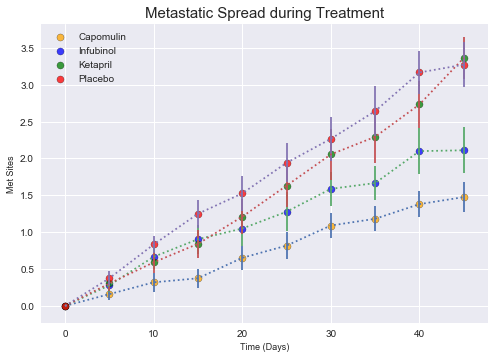

In [66]:
#adding the text to axis and overall title
plt.title('Metastatic Spread during Treatment', fontsize=15)
plt.xlabel('Time (Days)', fontsize=9)
plt.ylabel('Met Sites', fontsize=9)
plt.legend(handles=[_Capomulin,_Infubinol,_Ketapril,_Placebo], loc="best")

#show the plot
plt.show()

# Survival Rates

In [91]:
#total number of mice 

Total_mice=data.groupby("Drug")["Mouse ID"].nunique()

#Total number of mice by each drug

Total_mice_Capomulin=pd.DataFrame(Capomulin_data.groupby(["Timepoint"])["Mouse ID"].nunique())
Total_mice_Infubinol=pd.DataFrame(Infubinol_data.groupby(["Timepoint"])["Mouse ID"].nunique())
Total_mice_Ketapril=pd.DataFrame(Ketapril_data.groupby(["Timepoint"])["Mouse ID"].nunique())
Total_mice_Placebo=pd.DataFrame(Placebo_data.groupby(["Timepoint"])["Mouse ID"].nunique())

In [92]:
#Survival rate by each of four drug
Survival_Capomulin=(Total_mice_Capomulin/Total_mice["Drug"=="Capomulin"])*100
Survival_Infubinol=(Total_mice_Infubinol/Total_mice["Drug"=="Infubinol"])*100
Survival_Ketapril=(Total_mice_Ketapril/Total_mice["Drug"=="Ketapril"])*100
Survival_Placebo=(Total_mice_Placebo/Total_mice["Drug"=="Placebo"])*100

In [93]:
# Y-axis for each group of medicine

Survival_Capomulin_y=Survival_Capomulin["Mouse ID"]
Survival_Infubinol_y=Survival_Infubinol["Mouse ID"]
Survival_Ketapril_y=Survival_Ketapril["Mouse ID"]
Survival_Placebo_y=Survival_Placebo["Mouse ID"]


In [94]:
#plot the scatter plot for each medicine

rate_Capomulin=plt.scatter(Capomulin_x, Survival_Capomulin_y, 
                      marker="o",facecolors="Orange", edgecolors="black",s=50, alpha=0.75,label="Capomulin")

rate_Infubinol=plt.scatter(Infubinol_x, Survival_Infubinol_y
                      ,marker="o",facecolors="Blue", edgecolors="black",s=50, alpha=0.75,label="Infubinol")

rate_Ketapril=plt.scatter(Ketapril_x, Survival_Ketapril_y, 
                    marker="o",facecolors="Green", edgecolors="black",s=50, alpha=0.75,label="Ketapril")

rate_Placebo=plt.scatter(Placebo_x, Survival_Placebo_y 
                 , marker="o",facecolors="Yellow", edgecolors="black",s=50, alpha=0.75,label="Placebo")

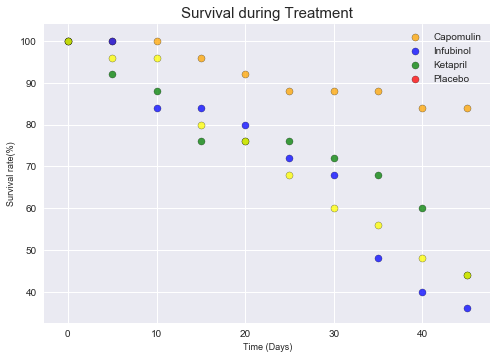

In [95]:
#adding the text to axis and overall title
plt.title('Survival during Treatment', fontsize=15)
plt.xlabel('Time (Days)', fontsize=9)
plt.ylabel('Survival rate(%)', fontsize=9)
plt.legend(handles=[_Capomulin,_Infubinol,_Ketapril,_Placebo], loc="best")

#show the plot
plt.show()

# Bar Graph

In [96]:
# percent volume change vy four drugs

volume_Capomulin=pd.DataFrame(Capomulin_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())
percent_Capomuli=((volume_Capomulin.iloc[-1,:]-volume_Capomulin.iloc[0,:])/volume_Capomulin.iloc[0,:])*100

volume_Infubinol=pd.DataFrame(Infubinol_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())
percent_Infubinol=((volume_Infubinol.iloc[-1,:]-volume_Infubinol.iloc[0,:])/volume_Infubinol.iloc[0,:])*100

volume_Ketapril=pd.DataFrame(Ketapril_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())
percent_Ketapril=((volume_Ketapril.iloc[-1,:]-volume_Ketapril.iloc[0,:])/volume_Ketapril.iloc[0,:])*100

volume_Placebo=pd.DataFrame(Placebo_data.groupby(["Timepoint"])["Tumor Volume (mm3)"].mean())
percent_Placebo=((volume_Placebo.iloc[-1,:]-volume_Placebo.iloc[0,:])/volume_Placebo.iloc[0,:])*100


In [97]:
# y-Axis calculation

volume_change=[percent_Capomuli,percent_Infubinol,percent_Ketapril,percent_Placebo]
volume_change[0].values

array([-19.47530267])

In [98]:
#Label of x-axis 

label=["Capomulin","Infubinol","Ketapril","Placebo"]

# X-axis calculation

x_axis = np.arange(len(label))

In [102]:
# plot the bar graph with Seaborn library


# Sets the x limits of the current chart

plt.xlim(0, len(x_axis))

#color palatte based on value of y

lenth=len(volume_change)

color=["green" if (volume_change[i].values>0) else "red" for i in range(lenth)]

#plot the Bar graph

sns.barplot(x_axis,volume_change,palette=color)



In [103]:
# Tell matplotlib where we would like to place each of our x axis headers

tick_locations = [value-0.1 for value in x_axis]
plt.xticks(tick_locations,label)

([<matplotlib.axis.XTick at 0x11327cd30>,
 <a list of 4 Text xticklabel objects>)

In [104]:
# Give our chart some labels and a tile
plt.title("Tumor change over 45 days tratment")
plt.ylabel("% volume change")

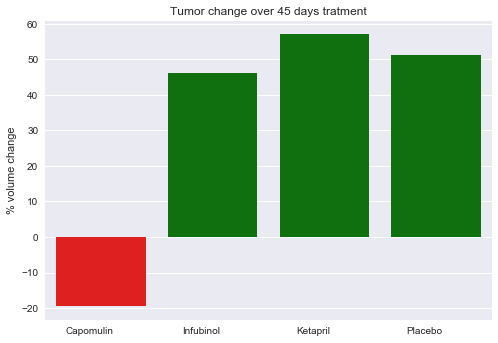

In [105]:
plt.show()